In [53]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
import pickle
pylab.rcParams['figure.figsize'] = (8.0, 10.0)
import pandas as pd
import pickle
from PIL import Image

In [54]:
def load_ann(dataDir,dataType):
    annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)
    return annFile

In [31]:
annFile = load_ann('D:','train2014')

In [55]:
annFile = load_ann('D:','val2014')

In [56]:
coco=COCO(annFile)

loading annotations into memory...
Done (t=8.81s)
creating index...
index created!


In [57]:
coco

In [101]:
with open('coco_obj.pkl', 'wb') as output:  
        pickle.dump(coco, output, pickle.HIGHEST_PROTOCOL)


In [3]:
with open('coco_obj.pkl', 'rb') as inp:
    coco = pickle.load(inp)

In [58]:
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
person bicycle car motorcycle airplane bus train truck boat traffic light fire hydrant stop sign parking meter bench bird cat dog horse sheep cow elephant bear zebra giraffe backpack umbrella handbag tie suitcase frisbee skis snowboard sports ball kite baseball bat baseball glove skateboard surfboard tennis racket bottle wine glass cup fork knife spoon bowl banana apple sandwich orange broccoli carrot hot dog pizza donut cake chair couch potted plant bed dining table toilet tv laptop mouse remote keyboard cell phone microwave oven toaster sink refrigerator book clock vase scissors teddy bear hair drier toothbrush

COCO supercategories: 
furniture electronic person food indoor animal kitchen appliance outdoor accessory vehicle sports


In [59]:
f=coco.getCatIds()

In [60]:
coco.loadCats(f[:])

[{'supercategory': 'person', 'id': 1, 'name': 'person'},
 {'supercategory': 'vehicle', 'id': 2, 'name': 'bicycle'},
 {'supercategory': 'vehicle', 'id': 3, 'name': 'car'},
 {'supercategory': 'vehicle', 'id': 4, 'name': 'motorcycle'},
 {'supercategory': 'vehicle', 'id': 5, 'name': 'airplane'},
 {'supercategory': 'vehicle', 'id': 6, 'name': 'bus'},
 {'supercategory': 'vehicle', 'id': 7, 'name': 'train'},
 {'supercategory': 'vehicle', 'id': 8, 'name': 'truck'},
 {'supercategory': 'vehicle', 'id': 9, 'name': 'boat'},
 {'supercategory': 'outdoor', 'id': 10, 'name': 'traffic light'},
 {'supercategory': 'outdoor', 'id': 11, 'name': 'fire hydrant'},
 {'supercategory': 'outdoor', 'id': 13, 'name': 'stop sign'},
 {'supercategory': 'outdoor', 'id': 14, 'name': 'parking meter'},
 {'supercategory': 'outdoor', 'id': 15, 'name': 'bench'},
 {'supercategory': 'animal', 'id': 16, 'name': 'bird'},
 {'supercategory': 'animal', 'id': 17, 'name': 'cat'},
 {'supercategory': 'animal', 'id': 18, 'name': 'dog'},

In [61]:
def get_ann_and_id(list):
    catIds = coco.getCatIds(catNms=list)
    imgIds = coco.getImgIds(catIds=catIds )
    annIds = coco.getAnnIds(imgIds=imgIds, catIds=catIds)
    anns = coco.loadAnns(annIds)
    return catIds,imgIds,annIds,anns
    
    

In [62]:
data_ = get_ann_and_id(['dog','person'])

In [63]:
data_[0]

[1, 18]

In [64]:
i=0
for k in data_[3]:
    print(k['bbox'])
    i+=1
    if i==3:
        break

[263.98, 181.71, 109.47, 90.68]
[88.31, 67.55, 31.92, 35.58]
[205.69, 70.79, 19.2, 26.56]


In [65]:
def get_anns(data):
    bbox= [k['bbox'] for k in data]
    seg= [k['segmentation'] for k in data]
    imgid= [k['image_id'] for k in data]
    cat_id = [k['category_id'] for k in data]
    return bbox,seg,imgid,cat_id
    

In [66]:
bbox,seg,img_id,cat_id= get_anns(data_[3])

In [67]:
for i,k in enumerate(cat_id):
    if k==18:
        cat_id[i]=1
    else:
        cat_id[i] =0
    

In [68]:
data = {'Image_ID':img_id,'Bounding_Box':bbox,'Segmentation':seg,'Category_ID':cat_id}

In [69]:
def get_dataframe(data):
    df=pd.DataFrame(data=data)
    return df
    

In [71]:
df_train=get_dataframe(data)
df_val =get_dataframe(data)

In [47]:
df_train.head(10)

Image_ID                      Bounding_Box  \
0    524291   [279.7, 148.88, 348.54, 272.82]   
1    524291     [0.0, 231.78, 285.83, 109.94]   
2    524291       [0.0, 0.96, 133.07, 204.86]   
3    491525  [246.28, 166.76, 285.87, 307.12]   
4    491525   [161.77, 200.27, 309.7, 253.65]   
5    311301      [0.0, 271.18, 229.6, 156.82]   
6    311301   [147.16, 77.91, 337.59, 229.87]   
7    311301     [299.41, 69.05, 57.58, 61.41]   
8    311301       [388.61, 0.8, 65.37, 39.65]   
9    106525      [0.97, 25.05, 243.39, 448.0]   

                                        Segmentation  Category_ID  
0  [[598.98, 190.19, 572.3, 162.65, 555.95, 154.0...            1  
1  [[37.56, 337.14, 2.75, 336.22, 0.0, 240.03, 15...            1  
2  [[65.1, 1.91, 67.97, 57.44, 89.99, 37.33, 99.5...            0  
3  [[444.27, 365.71, 421.09, 329.01, 401.77, 292....            1  
4  [[229.22, 312.37, 209.27, 306.67, 196.92, 299....            0  
5  [[0.0, 300.64, 2.6, 296.31, 1.73, 422.8, 1.73,...            1  
6  [[168.31, 189.47, 164.47, 197.17, 161.58, 210....            0  
7  [[346.43, 130.46, 299.41, 127.58, 301.33, 115....            0  
8  [[388.61, 6.29, 391.98, 0.8, 418.13, 2.07, 426...            0  
9  [[134.79, 236.44, 208.48, 234.51, 200.73, 205....            1

In [72]:
df_val.head(9)

Image_ID                     Bounding_Box  \
0    413704  [263.98, 181.71, 109.47, 90.68]   
1    413704     [88.31, 67.55, 31.92, 35.58]   
2    413704     [205.69, 70.79, 19.2, 26.56]   
3    413704    [369.49, 71.78, 21.35, 28.91]   
4    413704    [123.92, 74.72, 28.47, 26.34]   
5    413704    [414.28, 25.6, 36.51, 103.17]   
6    413704    [325.43, 77.59, 42.88, 42.56]   
7    413704       [313.01, 70.2, 25.3, 32.2]   
8    413704     [297.63, 71.34, 20.43, 29.0]   

                                        Segmentation  Category_ID  
0  [[308.49, 272.06, 317.07, 272.39, 318.39, 269....            1  
1  [[91.98, 88.46, 91.98, 85.16, 93.45, 84.06, 97...            0  
2  [[206.74, 93.41, 205.69, 95.25, 208.32, 97.09,...            0  
3  [[372.13, 85.39, 371.75, 93.89, 372.32, 100.69...            0  
4  [[123.92, 99.13, 124.56, 97.63, 128.2, 96.99, ...            0  
5  [[425.87, 42.41, 418.33, 37.19, 425.29, 25.6, ...            0  
6  [[325.43, 116.91, 326.88, 114.16, 330.61, 111....            0  
7  [[314.44, 99.24, 315.31, 83.71, 319.91, 78.82,...            0  
8  [[298.18, 97.06, 300.92, 95.42, 299.82, 90.49,...            0

In [48]:
df_train['Image_ID'][0]

524291

In [73]:
df_val['Image_ID'][0]

413704

In [49]:
df_train['Bounding_Box'][:5]

0     [279.7, 148.88, 348.54, 272.82]
1       [0.0, 231.78, 285.83, 109.94]
2         [0.0, 0.96, 133.07, 204.86]
3    [246.28, 166.76, 285.87, 307.12]
4     [161.77, 200.27, 309.7, 253.65]
Name: Bounding_Box, dtype: object

In [74]:
df_val['Bounding_Box'][:5]

0    [263.98, 181.71, 109.47, 90.68]
1       [88.31, 67.55, 31.92, 35.58]
2       [205.69, 70.79, 19.2, 26.56]
3      [369.49, 71.78, 21.35, 28.91]
4      [123.92, 74.72, 28.47, 26.34]
Name: Bounding_Box, dtype: object

In [50]:
def convert(size, box):
        dw = 1./size[0]
        dh = 1./size[1]
        x = (box[0] + box[2])/2.0
        y = (box[1] + box[3])/2.0
        w = box[2] - box[0]
        h = box[3] - box[1]
        x = x*dw
        w = w*dw
        y = y*dh
        h = h*dh
        return x,y,w,h

In [51]:
 img_id = [str(img) for img in img_id]

In [52]:
def convert_ann(bbox,img_id,cat_id,path_):
    for box in bbox:
        box[2] = box[0] + box[2]
        box[3] = box[1] + box[3]
    
    darknet_ann=[]
    for i,j in zip(img_id,bbox):
        path= path_ + str(0)*(12-len(i)) +  i + '.jpg'
        im = Image.open(path)
        size = im.size
        darknet_ann.append(convert(size,j))
    dnet_ann =  []
    for i,k in zip(darknet_ann,cat_id):
        i = ' '.join(map(str,i))
        j= str(k) + ' ' + i
        dnet_ann.append(j)
    return dnet_ann
    

In [52]:
darknet_train=convert_ann(bbox,img_id,cat_id,'../train2014/COCO_train2014_')

In [31]:
darknet_val= convert_ann(bbox,img_id,cat_id,'../val2014/COCO_val2014_')

In [53]:
darknet_train[0]

'1 0.9278437500000001 0.8444366197183097 0.9816250000000001 0.9899061032863848'

In [32]:
darknet_val[0]

'1 0.63743 0.6054666666666667 0.21894000000000005 0.24181333333333327'

In [70]:
with open('train_.txt','w+') as f:
    for line in darknet_train:
        f.write(line)
        f.write('\n')
    f.close()
   

In [33]:
with open('val_.txt','w+') as f:
    for line in darknet_val:
        f.write(line)
        f.write('\n')
    f.close()

In [35]:
len(darknet_val)

3046

In [36]:
def get_txts(img_id,darknet_,path):
    darknet={}
    for i,k in zip(img_id,darknet_):
        if i in darknet:
            darknet[i].append(k)
        else:
            darknet[i] =[k]
    for i,k in darknet.items():
        with open(path.format(str(0)*(12-len(i)) + i + '.txt'),'w+') as f:
            for line in k:
                f.write(line)
                f.write('\n')
        f.close()
    return darknet
    

In [69]:
train_darknet = get_txts(img_id,darknet_train,'COCO_train2014_{}')

In [38]:
val_darknet =  get_txts(img_id,darknet_val,'COCO_val2014_{}')

In [39]:
def write_path(value,path):
    with open('train.txt','w+') as file:
        for i in value:
            file.write(path.format(str(0)*(12-len(i))) + i + '.jpg')
            file.write('\n')
    file.close()
    

   
    
    
        
                

In [72]:
write_path(train_darknet,'D:/train2014/' + 'COCO_train2014_{}')

In [40]:
write_path(val_darknet,'D:/val2014/' + 'COCO_val2014_{}')

In [10]:
#Now that we have our data ready to feed in to the darknet yolov3 framework. we will train it for many iterations
#until loss decreases to some acceptable value or it saturates.


In [76]:
from IPython.display import Image

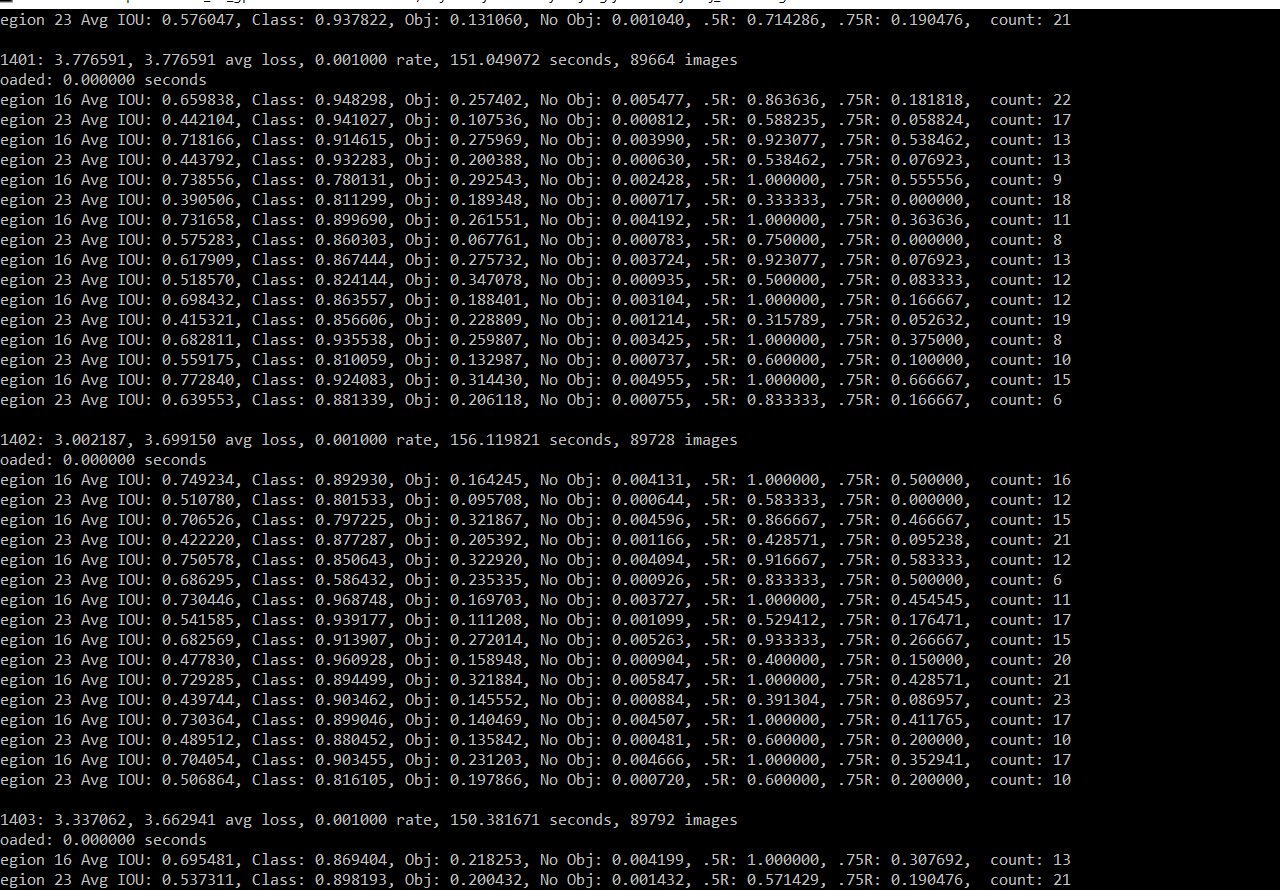

In [77]:
#This is how training looks like in darknet framework utilizing yolov3
Image('train.png')

In [78]:
#Now we will test the model with some test images

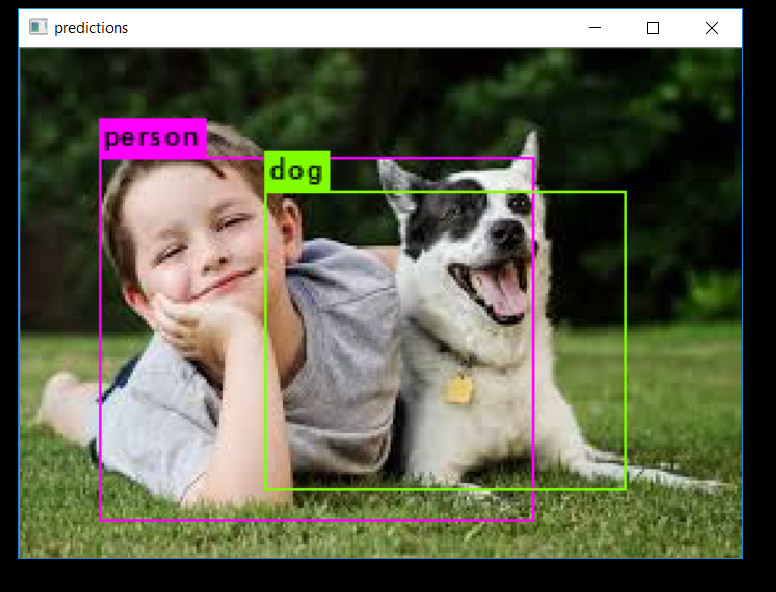

In [79]:
Image('test1.png')

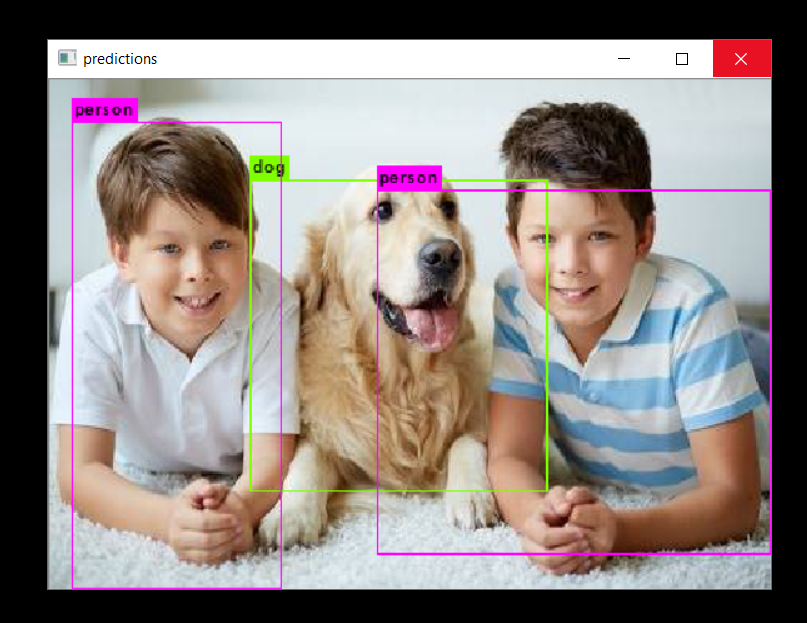

In [80]:
Image('test2.png')

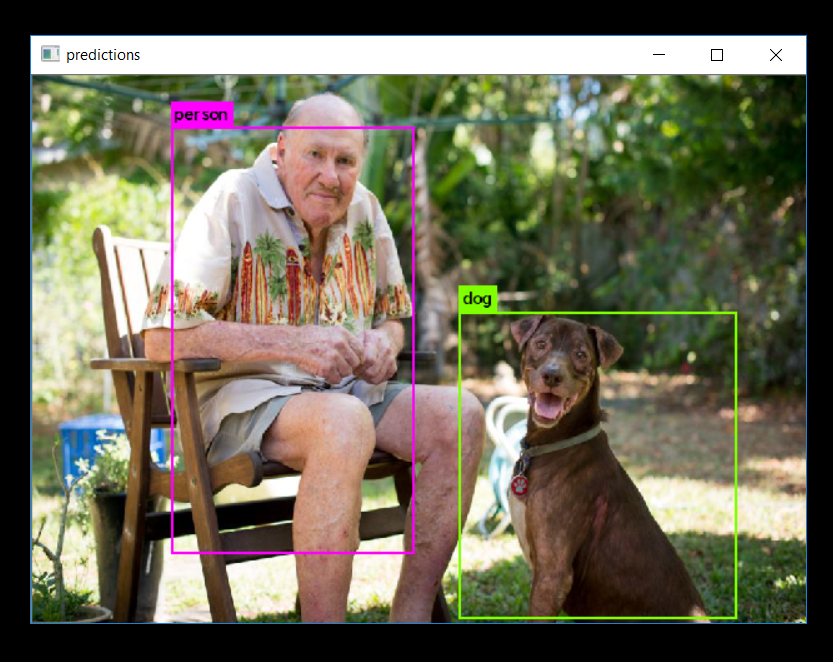

In [81]:
Image('test3.png')

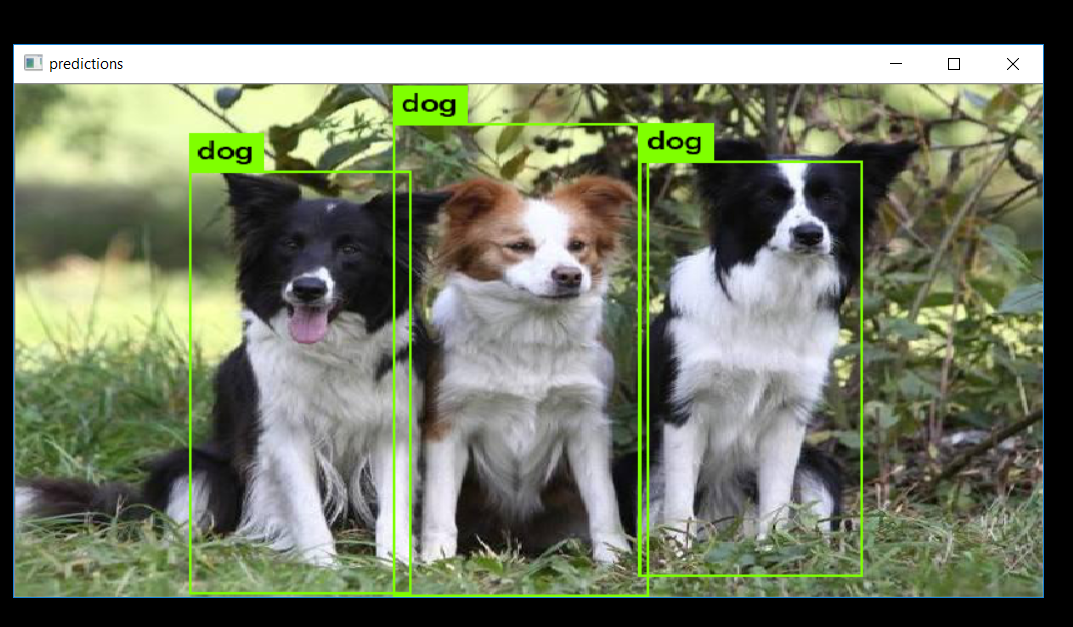

In [82]:
Image('test5.png')

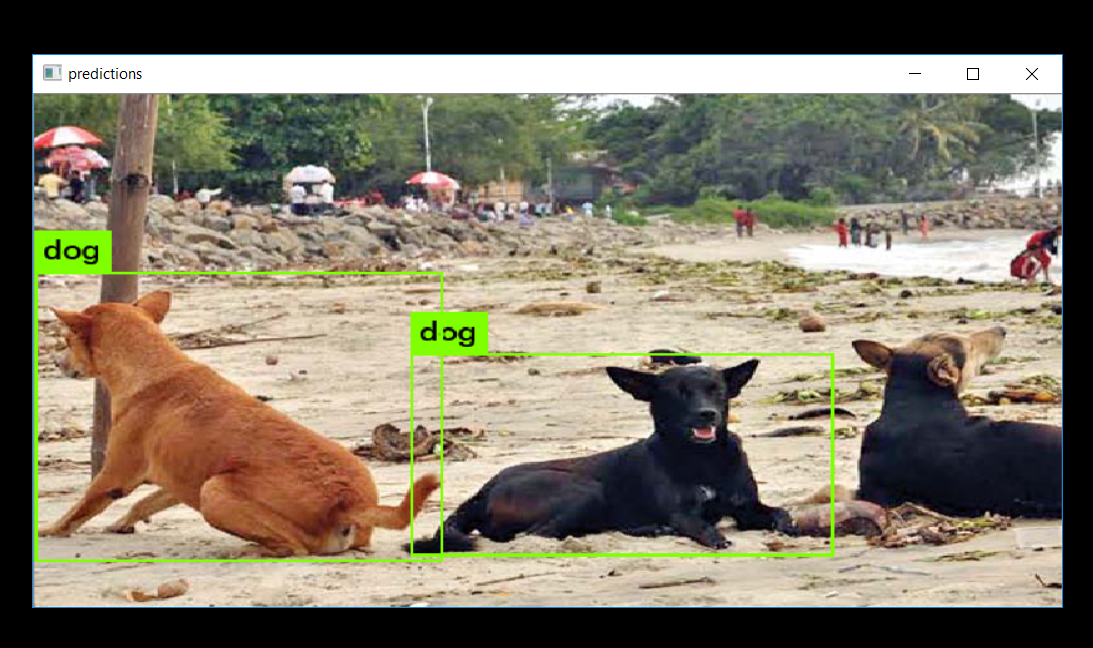

In [83]:
Image('test6.png')
#In this image we can see that it is unable to predict the dog in the rightmost corner.
#I think it could be due to less training data containing dog images.
#Using more data and more iterations could improve the reults.